# Application of MPBNs to the Tumour invasion model by Cohen et al. 2015

We use Most Permissive Boolean Networks to analyse the Boolean model published in
[(Cohen et al., 2015)](https://doi.org/10.1371/journal.pcbi.1004571)
which shows cell fate decision processes related to tumour development.

In [1]:
import ginsim
from colomoto_jupyter import tabulate

In [2]:
import mpbn

## Model setup
### Original model

Downloading http://ginsim.org/sites/default/files/SuppMat_Model_Master_Model.zginml

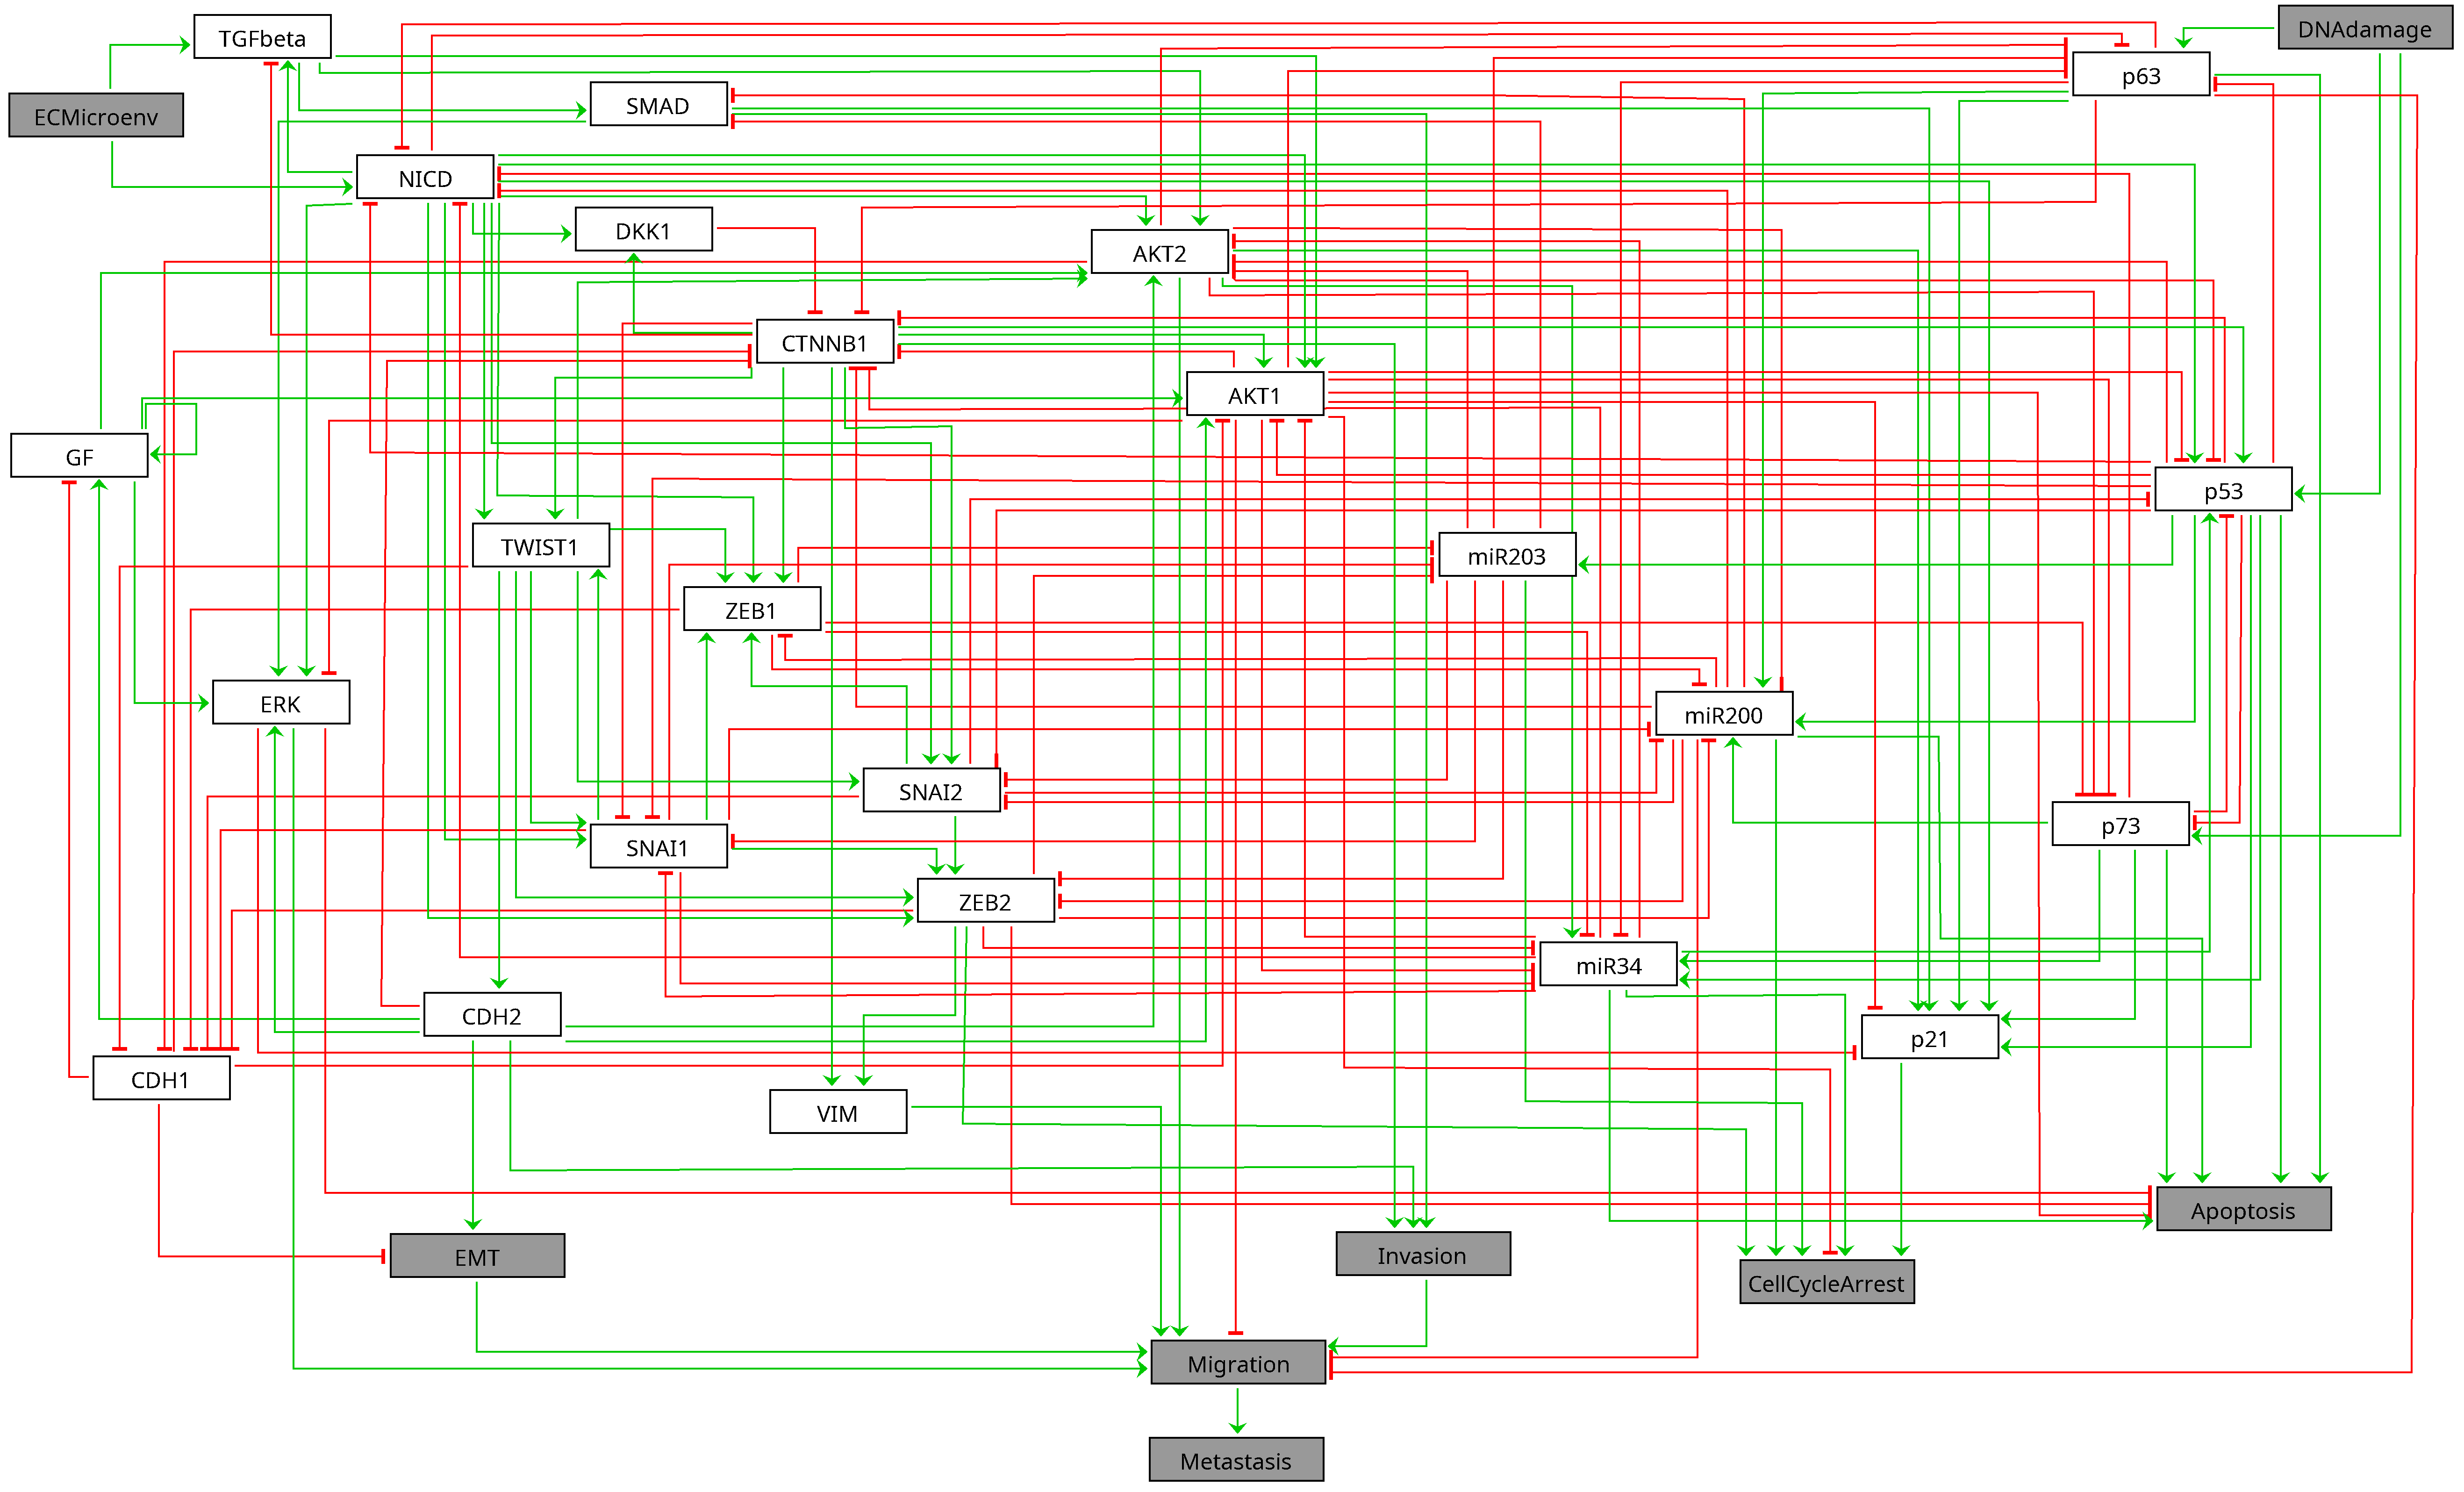

In [3]:
lrg = ginsim.load("http://ginsim.org/sites/default/files/SuppMat_Model_Master_Model.zginml")
ginsim.show(lrg)

### Conversion to MPBN

In [4]:
bn = ginsim.to_minibn(lrg)
mbn = mpbn.MPBooleanNetwork(bn)
len(mbn) # display number of nodes

32

### Input and output nodes

In [5]:
inputs = ["DNAdamage", "ECMicroenv"]
outputs = ["Apoptosis","CellCycleArrest","EMT","Invasion","Migration","Metastasis"]

## Analysis of reachable attractors

### Complete listing of attractors
Let us first compute the full list of attractors of the MPBN.

In [6]:
%time a = list(mbn.attractors())
tabulate(a, columns=outputs)

CPU times: user 9.13 ms, sys: 1.07 ms, total: 10.2 ms
Wall time: 9.39 ms


,Apoptosis,CellCycleArrest,EMT,Invasion,Migration,Metastasis
0,0,0,0,0,0,0
1,0,1,1,0,0,0
2,0,1,1,1,1,1
3,1,1,0,0,0,0


Remark they are all fixed points and thus match exactly with the attractors using asynchronous BNs.

### Rechable attractors

Starting from all nodes but inputs to 0, we are interested in the set of reachable attractors, whatever the value of input nodes.

In [7]:
initial_condition = dict([(n,0) for n in bn if n not in inputs])

#### Wild-type
Let us first compute the reachable attractors in the wild type model. They match with the full attract listing.

In [8]:
%time a = list(mbn.attractors(reachable_from=initial_condition))
tabulate(a, columns=outputs)

CPU times: user 20.9 ms, sys: 1.01 ms, total: 21.9 ms
Wall time: 20.6 ms


,Apoptosis,CellCycleArrest,EMT,Invasion,Migration,Metastasis
0,0,0,0,0,0,0
1,0,1,1,0,0,0
2,0,1,1,1,1,1
3,1,1,0,0,0,0


#### Notch GoF mutant
Now, we apply the Notch gain of function, and predict, as MaBoSS with asynchronous BNs, the loss of apoptotic attractor reachability.

In [9]:
mbn_mut = mbn.copy()
mbn_mut["NICD"] = 1
%time a = list(mbn_mut.attractors(reachable_from=initial_condition))
tabulate(a, columns=outputs)

CPU times: user 21.1 ms, sys: 37 µs, total: 21.2 ms
Wall time: 19.5 ms


,Apoptosis,CellCycleArrest,EMT,Invasion,Migration,Metastasis
0,0,1,1,0,0,0
1,0,1,1,1,0,0
2,0,1,1,1,1,1


#### Notch GoF/p53 LoF double mutant
Adding p53 loss of function, leads, as MaBoSS, only to the metastatic attractor.

In [10]:
mbn_mut["p53"] = 0
%time a = list(mbn_mut.attractors(reachable_from=initial_condition))
tabulate(a, columns=outputs)

CPU times: user 10.2 ms, sys: 949 µs, total: 11.2 ms
Wall time: 10.2 ms


,Apoptosis,CellCycleArrest,EMT,Invasion,Migration,Metastasis
0,0,1,1,1,1,1
